In [1]:
import semiolog as slg

import random
semiotic = slg.load("en_bnc")
test_sents = semiotic.test_sents()

In [12]:
import spacy
import benepar

nlp_ud = spacy.load("en_core_web_sm")

nlp_cp = spacy.load("en_core_web_sm")
nlp_cp.add_pipe("benepar", config={"model": "benepar_en3"})

In [55]:
test_sent = random.choice(test_sents)

print(test_sent)
test = semiotic(test_sent)

he began to laugh uproariously and glanced at his companion


In [56]:
bla = list(nlp_cp(test.chain.raw).sents)[0]
print([c for c in list(bla._.constituents) if str(c).count(" ") == 1])
[(p.mass,p.entropy,l) for l,p in zip(test.chain.split,test.paradigm)]

[laugh uproariously, his companion]


[(0.28869787452276796, 4.4167674074957946, 'he'),
 (0.9925340183908702, 2.215258704240355, 'began'),
 (0.999936544409394, 0.014447505647223424, 'to'),
 (0.9305973512819037, 2.776691839899034, 'laugh'),
 (0.9034227631636895, 2.911530939079393, 'uproariously'),
 (0.9531312183189584, 0.3752297401589106, 'and'),
 (0.7687939840834588, 3.804030777884289, 'glanced'),
 (0.9993959255384652, 1.0569604831274213, 'at'),
 (0.9917887293213425, 1.15121609603805, 'his'),
 (0.1664089716214221, 4.025090088991059, 'companion')]

/usr/local/lib/python3.9/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


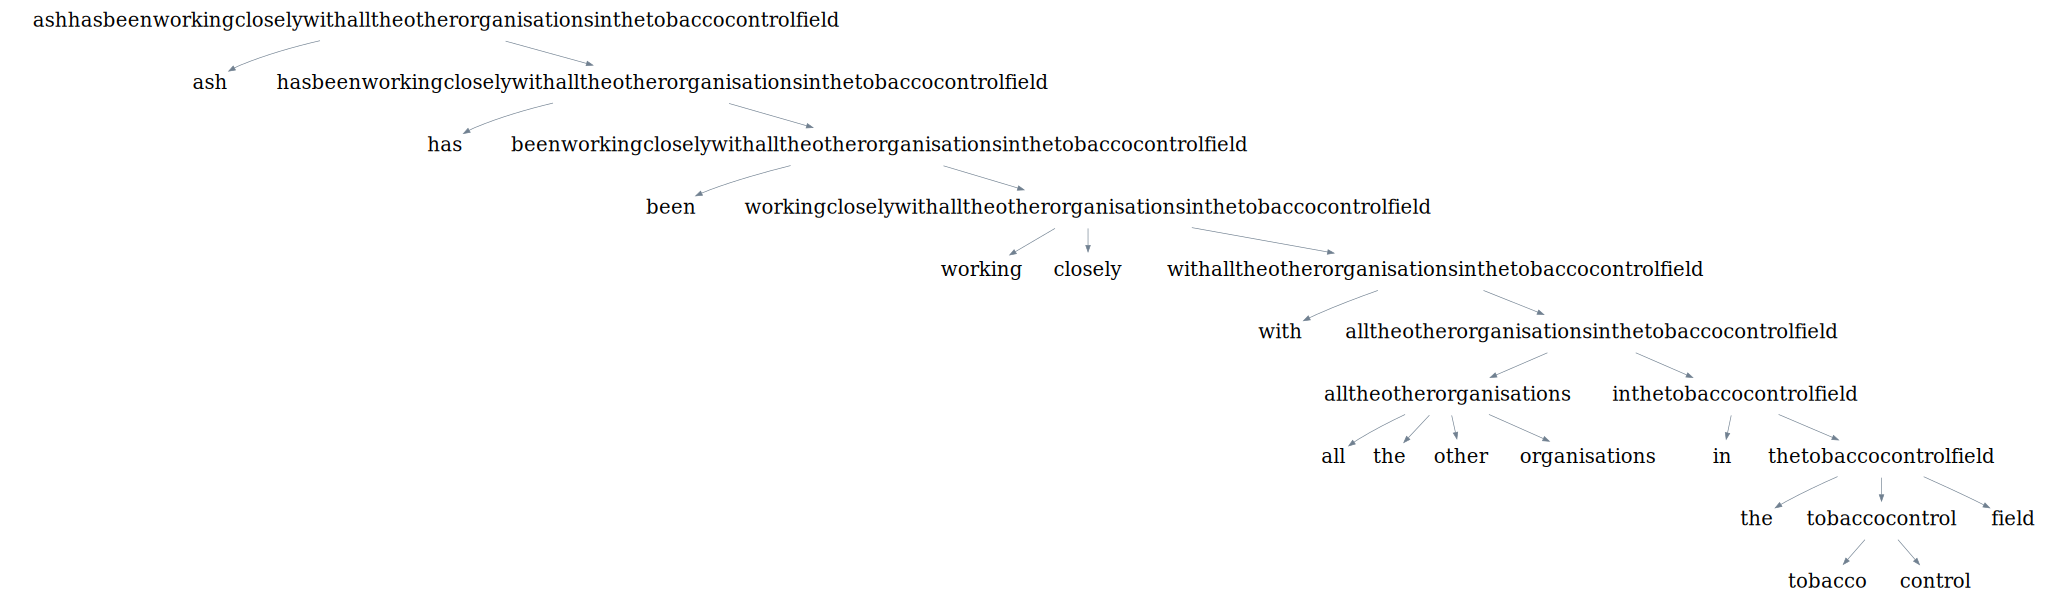

In [50]:
test.chain.segment("cp").plot()

<AxesSubplot:title={'center':'Title'}, xlabel='x', ylabel='f(x)'>

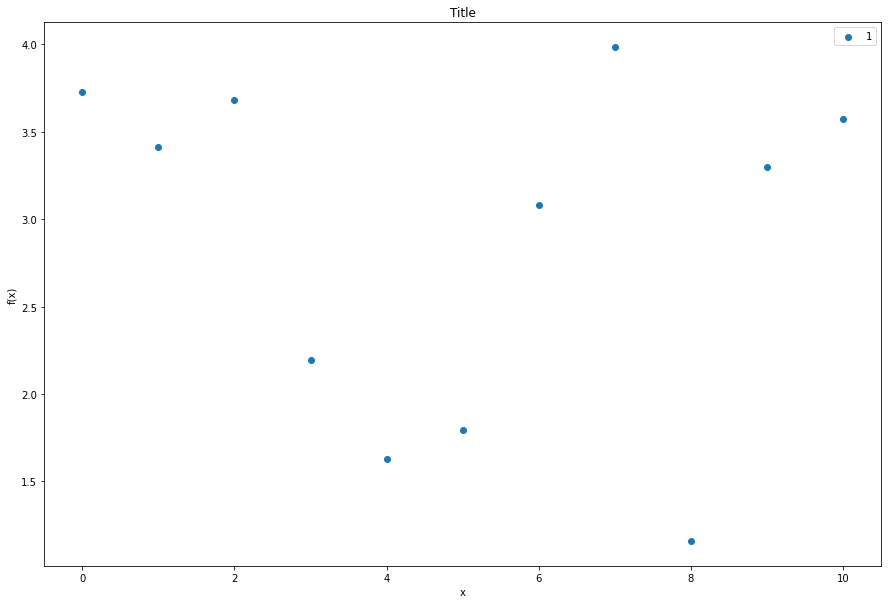

In [44]:
from semiolog import util_g

util_g.scatter_plot([[p.entropy for p in test.paradigm]])